In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'svg'

### Import and General Data Info

Read csv file into a pandas dataframe (df)

In [234]:
df = pd.read_csv('./datasets/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


We get general insights from the data

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


As can be seen above, there are 48,842 entries in each category with no null or missing entries

In [236]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


The above table takes a look at various numerical data linked to each category such as the count (number of entries), the mean, the quartile categories (25%, 50%, 75% and maximum(100%)) as well as minimum values in each category

Then we take a look at the categories the data is divided into

In [237]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Insights

### Number of People of Each Race Represented in the Data

First we get the number of people of each race in the data

First we get number of people by race in the data

In [238]:
# df.groupby('race').race.count() ## Alt approach
df.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

Then we create a race count dataframe/table (df_race) from which to visualize the data

In [239]:
df_race = pd.DataFrame(df.groupby('race').race.count())
df_race = df_race.rename(columns={0:'race', 'race':'count'}).sort_values('count', ascending=False).reset_index()
df_race

,race,count
0,White,41762
1,Black,4685
2,Asian-Pac-Islander,1519
3,Amer-Indian-Eskimo,470
4,Other,406


Now we visualize the race distribution in the dataset

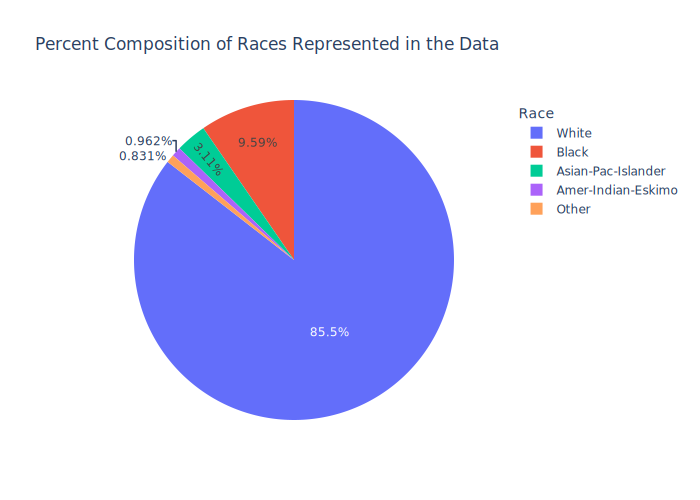

In [240]:
fig1_1 = px.pie(df_race, values='count', names='race', title="Percent Composition of Races Represented in the Data").update_layout(legend=dict(title="Race"))
fig1_1

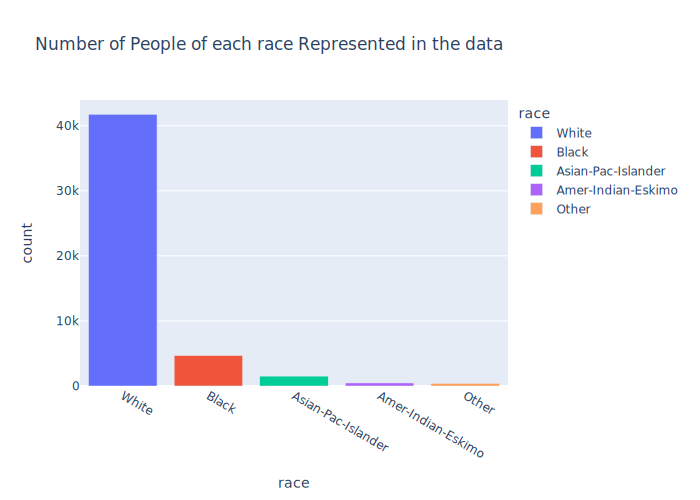

In [241]:
fig1_2 = px.bar(df_race, x='race', y='count', color='race', title="Number of People of each race Represented in the data")
fig1_2

As can be observed above, an overwhelming number of people in the data are White accounting for over 85% of the races represented in the data. this is followed by just under 9.6% Black representation and about 3.1% Asians repesented in the data.

### Number of each gender represented in the dataset

First we get the count categorized by sex in the data

In [242]:
# df.groupby('sex').sex.count() ## Alt approach
df.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

Then we create a dataframe table illustrating the number of each sex (df_g) represented in the data

In [243]:
df_g = pd.DataFrame(df.groupby('gender').gender.count())
df_g = df_g.rename(columns={0:'gender', 'gender':'count'}).sort_values('count', ascending=False).reset_index()
df_g

,gender,count
0,Male,32650
1,Female,16192


Finally, we can visualize the gender composition in the data

First a pie chart showing percentage composition

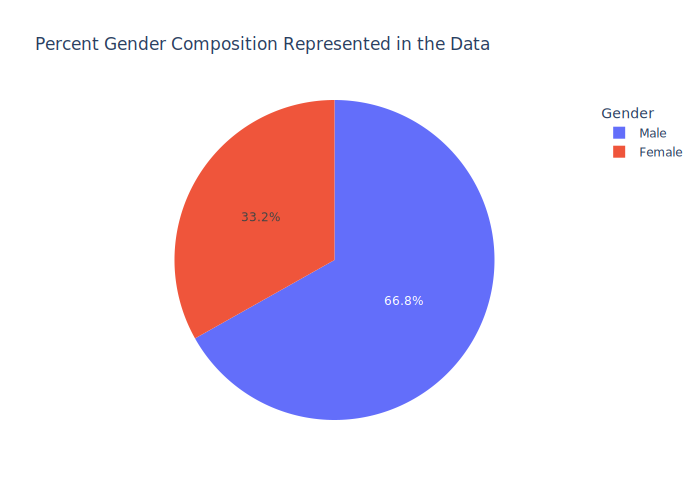

In [244]:
fig2_1 = px.pie(df_g, values='count', names='gender', title="Percent Gender Composition Represented in the Data").update_layout(legend=dict(title="Gender"))
fig2_1

Then a bar chart displaying the numerical composition

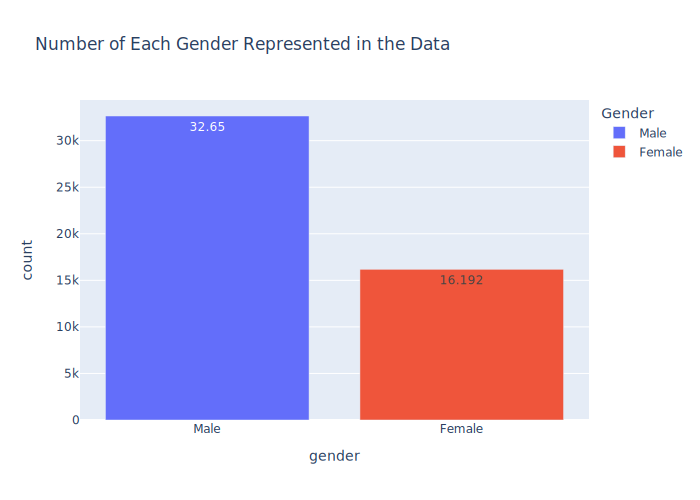

In [245]:
fig2_2 = px.bar(df_sex, x='gender', y='count', color='gender', text=(df_sex['count']/1000), title="Number of Each Gender Represented in the Data").update_layout(legend=dict(title="Gender"))
fig2_2

### Composition & Categorization by Age Group

##### Average Age of each Gender

In [246]:
df.groupby('gender')['age'].mean()

gender
Female    36.927989
Male      39.494395
Name: age, dtype: float64

In [247]:
df.groupby('gender')['age'].min()

gender
Female    17
Male      17
Name: age, dtype: int64

In [248]:
df.groupby('gender')['age'].max()

gender
Female    90
Male      90
Name: age, dtype: int64

As far as the minimum and maximum registered age in the data, in both cases, yougest registered entry for each sex is 17 and the oldest 90.

#### Categorization by Age, Age Group and Sex

##### Composition by Age and Sex 

In [249]:
df.groupby(['age', 'gender'])['gender'].count()

age  gender
17   Female    295
     Male      300
18   Female    427
     Male      435
19   Female    514
              ... 
88   Female      1
     Male        5
89   Male        2
90   Female     17
     Male       38
Name: gender, Length: 146, dtype: int64

### Categorization by Age Group & Sex

#### Creation of Age-Sex Dataframes/Table

Number of people under 25

In [250]:
under_25 = df[df['age'] < 25].gender.value_counts()
df_u_25 = pd.DataFrame(under_25).reset_index().rename(columns={'index':'gender', 'gender':'count'})
df_u_25

,gender,count
0,Male,4613
1,Female,3819


Number of people aged 25-34 years

In [251]:
age_25_34 = df[(df['age'] >= 25) & (df['age'] < 35)].gender.value_counts()
df_25_34 = pd.DataFrame(age_25_34).reset_index().rename(columns={'index':'gender', 'gender':'count'})
df_25_34

,gender,count
0,Male,8408
1,Female,4169


Number of people aged 35-44 years

In [252]:
age_35_44 = df[(df['age'] >= 35) & (df['age'] < 45)].gender.value_counts()
df_35_44 = pd.DataFrame(age_35_44).reset_index().rename(columns={'index':'gender', 'gender':'count'})
df_35_44

,gender,count
0,Male,8647
1,Female,3546


Number of people aged 45-54 years

In [253]:
age_45_54 = df[(df['age'] >= 45) & (df['age'] < 55)].gender.value_counts()
df_45_54 = pd.DataFrame(age_45_54).reset_index().rename(columns={'index':'gender', 'gender':'count'})
df_45_54

,gender,count
0,Male,6214
1,Female,2557


Number of people aged 55-64 years

In [254]:
age_55_64 = df[(df['age'] >= 55) & (df['age'] < 65)].gender.value_counts()
df_55_64 = pd.DataFrame(age_55_64).reset_index().rename(columns={'index':'gender', 'gender':'count'})
df_55_64

,gender,count
0,Male,3373
1,Female,1409


Number of people 65 years and older

In [255]:
over_65 = df[df['age'] >= 65].gender.value_counts()
df_65 = pd.DataFrame(over_65).reset_index().rename(columns={'index':'gender', 'gender':'count'})
df_65

,gender,count
0,Male,1395
1,Female,692


Now we create a dataframe/table of composition by age group and sex

In [256]:
df_ag = pd.concat({'under 25':df_u_25, '25-34':df_25_34, '35-44':df_35_44, '45-54':df_45_54, '55-64':df_55_64, '65 and over':df_65}, axis=0).reset_index().rename(columns={'level_0':'age group'})
df_ag.drop('level_1', inplace=True, axis=1)
df_ag

,age group,gender,count
0,under 25,Male,4613
1,under 25,Female,3819
2,25-34,Male,8408
3,25-34,Female,4169
4,35-44,Male,8647
5,35-44,Female,3546
6,45-54,Male,6214
7,45-54,Female,2557
8,55-64,Male,3373
9,55-64,Female,1409


Create a dataframe/table of mean age of each sex (df_ma)

In [257]:
df_ma = pd.DataFrame(df.groupby('gender')['age'].mean())
df_ma = df_ma.rename(columns={0:'gender', 'age':'average age'}).reset_index()
df_ma

,gender,average age
0,Female,36.927989
1,Male,39.494395


#### Visualization of Age-Gender Composition

Visualization of average age for each sex in the data

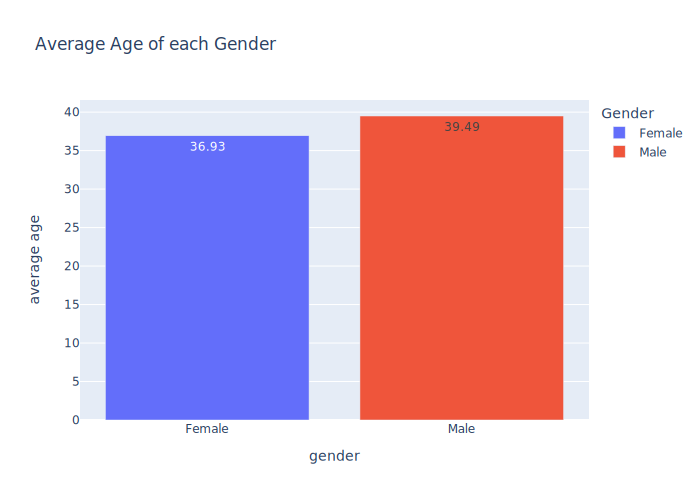

In [258]:
fig3 = px.bar(df_ma, x='gender', y='average age', color='gender', text=round(df_ma['average age'], 2), title="Average Age of each Gender").update_layout(legend=dict(title="Gender"))
fig3

As can be observed above the average age is 36.93 years for females and 39.49 years for males.

Now we visualize the age group composition by sex

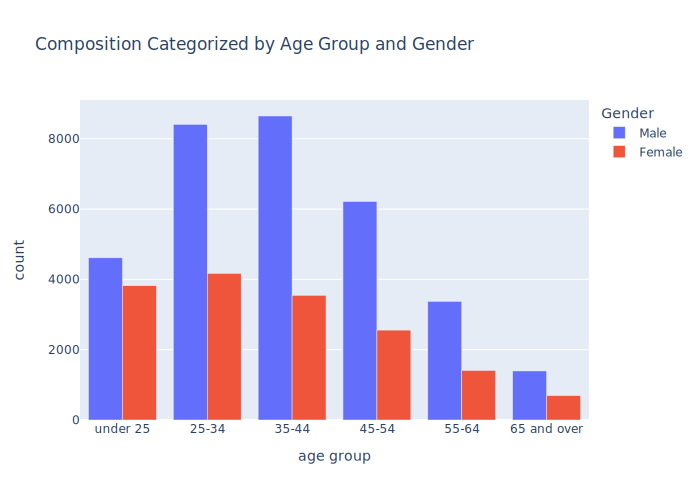

In [275]:
fig4 = px.bar(df_ag, x='age group', y='count', color='gender', barmode="group", title="Composition Categorized by Age Group and Gender").update_layout(legend=dict(title="Gender"))
fig4

### Demographic Analysis based on Education Level 

##### Percentage of people who have a Bachelor's degree

In [260]:
# Alt method
# bachelors_count = df.loc[df['education'] == 'Bachelors', 'education'].value_counts()
# bachelors_count = len(df[df['education'] == 'Bachelors'])

# Chosen method
bachelors_count = (df['education'] == 'Bachelors').sum()
bachelors_count/df.shape[0] * 100

16.430531100282543

##### Percentage of people with advanced education (Bachelors, Masters, or Doctorate) who make more than 50K

In [261]:
# Alt method
# len(df[df['education'].map(lambda x: x == ('Bachelors' or  'Masters' or 'Doctorate'))])
# df.loc[df['education'] == ('Bachelors' or 'Masters' or 'Doctorate'), 'income'].value_counts(dropna=False)

# Chosen method
num_high_bachelors_earners = df[(df.education == ('Bachelors')) & (df.income == '>50K')].income.count()
num_high_masters_earners = df[(df.education == 'Masters') & (df.income == '>50K')].income.count()
num_high_doctorate_earners = df[(df.education == 'Doctorate') & (df.income == '>50K')].income.count()

num_high_advanced_educated_earners = num_high_bachelors_earners + num_high_masters_earners + num_high_doctorate_earners

num_high_advanced_educated = df[df.education == 'Bachelors'].income.count() + df[df.education == 'Masters'].income.count() + df[df.education == 'Doctorate'].income.count()

percent_high_advanced_educated_earners = num_high_advanced_educated_earners/num_high_advanced_educated * 100
percent_high_advanced_educated_earners

46.14224902447677

##### Percentage of people without advanced education who make more than 50K

In [262]:
num_non_advanced_edcated = df[(df['education'] != 'Bachelors') & (df['education'] != 'Masters') & (df['education'] != 'Doctorate')].income.count()

num_high_non_advanced_educated_earners = df[(df['education'] != 'Bachelors') & (df['education'] != 'Masters') & (df['education'] != 'Doctorate') & (df['income'] == '>50K')].income.count()


percent_high_non_advanced_educated_earners = num_high_non_advanced_educated_earners/num_non_advanced_edcated * 100
percent_high_non_advanced_educated_earners

17.260288558803172

In [263]:
num_low_non_advanced_educated_earners = df[(df['education'] != 'Bachelors') & (df['education'] != 'Masters') & (df['education'] != 'Doctorate') & (df['income'] != '>50K')].income.count()

percent_low_non_advanced_educated_earners = num_low_non_advanced_educated_earners/num_non_advanced_edcated * 100

percent_low_non_advanced_educated_earners

82.73971144119683

##### Minimum, maximum and average number of hours a person works per week

Minimum number of hours a person works per week

In [264]:

min_work_hours = df['hours-per-week'].min()
min_work_hours

1

Maximum number of hours a person works per week

In [265]:
max_work_hours = df['hours-per-week'].max()
max_work_hours

99

Average number of hours a person works per week

In [266]:
mean_work_hours = df['hours-per-week'].mean()
mean_work_hours

40.422382375824085

##### Percentage of the people who work the minimum number of hours per week who have a salary of more than 50K

In [267]:
num_min_workers = df[df['hours-per-week'] == min_work_hours]

num_min_workers_income_over50 = df[(df['hours-per-week'] == min_work_hours) & (df['income'] == '>50K')]

percent_min_workers_income_over50 = num_min_workers_income_over50.income.count()/num_min_workers.income.count() * 100
percent_min_workers_income_over50

11.11111111111111

In [268]:
num_max_workers = df[df['hours-per-week'] == max_work_hours]
num_max_workers_income_over50 = df[(df['hours-per-week'] == max_work_hours) & (df['income'] == '>50K')]

percent_max_workers_income_over50 = num_max_workers_income_over50.income.count()/num_max_workers.income.count() * 100
percent_max_workers_income_over50

29.927007299270077

The percentage of people working the maximum 99 hours per week (29.9%) is nearly triple that of those who work the minimum 1 hour (11.1%).

In [269]:
# Percentage of people earning income over 50k by country

# num_income_over50_by_country = df[df['income'] == '>50K']['native-country'].value_counts()
num_income_over50_by_country = df[df['income'] == '>50K'].groupby('native-country')['income'].count()

num_by_country = df['native-country'].value_counts()
percent_income_over50_by_country = num_income_over50_by_country/num_by_country * 100
percent_income_over50_by_country.sort_values(ascending=False)

France                        42.105263
India                         41.059603
Taiwan                        40.000000
Iran                          37.288136
England                       37.007874
Greece                        36.734694
Yugoslavia                    34.782609
Japan                         34.782609
Canada                        34.615385
Italy                         32.380952
Cambodia                      32.142857
Hungary                       31.578947
Ireland                       29.729730
China                         29.508197
Philippines                   28.813559
Germany                       28.155340
Hong                          26.666667
?                             25.670945
Cuba                          24.637681
United-States                 24.397700
Poland                        19.540230
Portugal                      17.910448
South                         17.391304
Thailand                      16.666667
Scotland                      14.285714


Country that has the highest percentage of people that earn >50K and the percentage

In [270]:
print(percent_income_over50_by_country.idxmax(), percent_income_over50_by_country.max())

France 42.10526315789473


In [271]:
top_demographics_over50_france = df[(df['income'] == '>50K') & (df['native-country'] == 'France')]
top_demographics_over50_france.occupation.value_counts().idxmax()

'Exec-managerial'

Most popular occupation for those who earn >50K in India

In [272]:
top_demographics_over50_india = df[(df['income'] == '>50K') & (df['native-country'] == 'India')]
top_demographics_over50_india.occupation.value_counts().idxmax()

'Prof-specialty'

Most popular occupation overall for those who earn >50K

In [273]:
top_demographics_over50 = (df[df['income'] == '>50K']).occupation.value_counts().idxmax()
top_demographics_over50

'Exec-managerial'

Most popular occupation overall for those earning <=50K

In [274]:
top_demographics_under50 = (df[df['income'] == '<=50K']).occupation.value_counts().idxmax()
top_demographics_under50

'Adm-clerical'

**Exec-managerial** is the most common profession among people earning more than 50K, while **Adm-clerical** is the most common among people earning 50K and less.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67830035-8b85-459b-8213-52c1ff5a6b3a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>